# Домашнее задание

Математический анализ
69 баллов

**Задача 1** (14 баллов)

Найдите экстремумы функции:

$$
f(x, y, z)=2 x^3+2 x y+2 x z+y^2+z^2+2 y-8 .
$$

Распишите подробное решение.

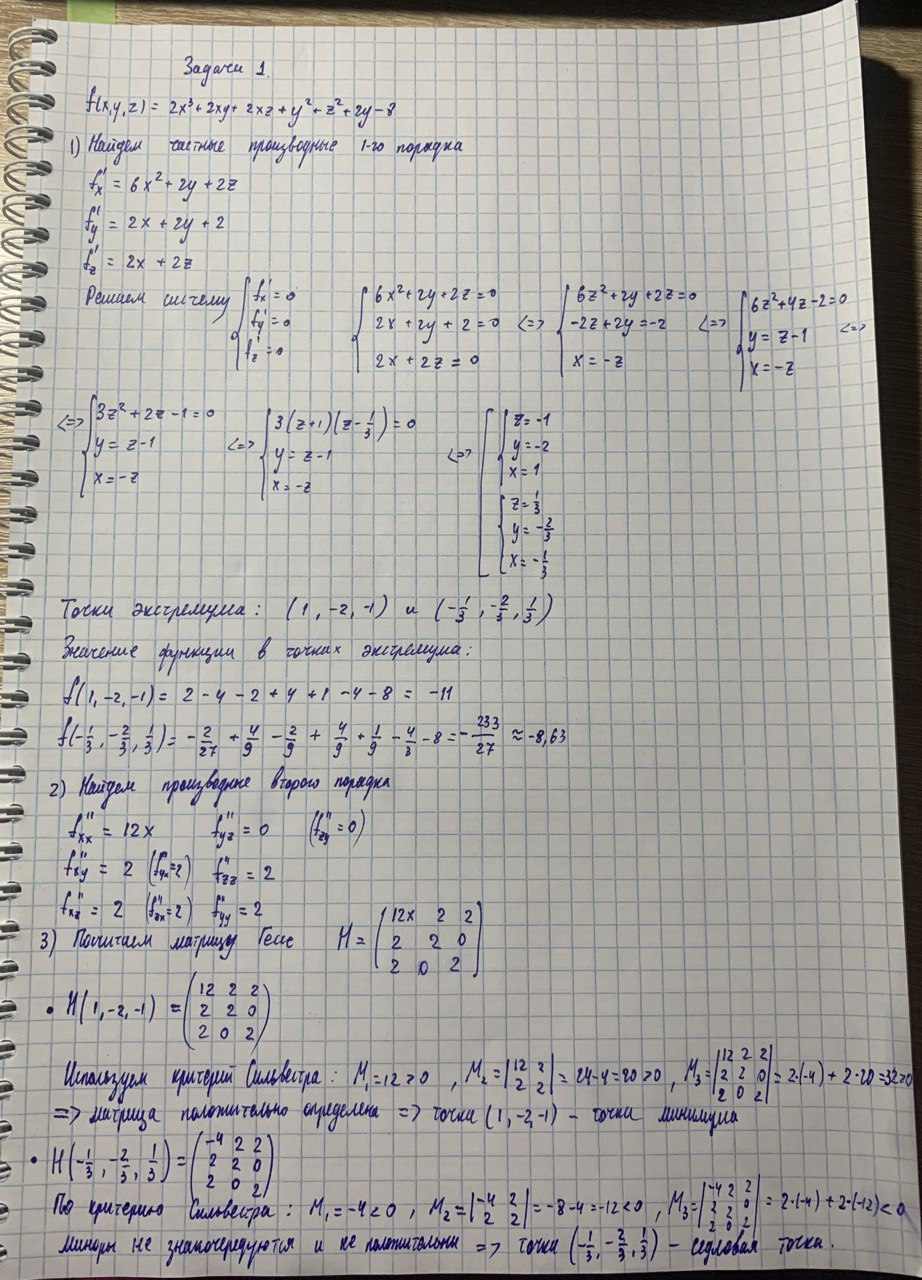

In [3]:
def func(x,y,z):
  return 2*x**3 + 2*x*y + 2*x*z + y**2 + z**2 + 2*y - 8

print(func(-1/3, -2/3, 1/3))
print(func(1, -2, -1))

-8.62962962962963
-11


In [1]:
from sympy import diff, pprint, hessian, symbols, solve

x, y, z = symbols('x y z')
f = 2*x**3 + 2*x*y + 2*x*z + y**2 + z**2 + 2*y - 8

f_x = diff(f, x)
f_y = diff(f, y)
f_z = diff(f, z)
f_dx = f.diff(x)
print(f'Частная производная по х: {f_x}')
print(f'Частная производная по y: {f_y}')
print(f'Частная производная по z: {f_z}')

critical_points = solve([f_x, f_y, f_z], (x, y, z))
print("\nКритические точки:")
for point in critical_points:
    print(point)

f_xx = f_x.diff(x)
print(f'\nЧастная производная по хx: {f_xx}')
f_yy = f_y.diff(y)
print(f'Частная производная по yy: {f_yy}')
f_zz = f_z.diff(z)
print(f'Частная производная по zz: {f_zz}')
f_xy = f_x.diff(y)
print(f'Частная производная по хy (yx): {f_xy}')
f_xz = f_x.diff(z)
print(f'Частная производная по хz (zx): {f_xz}')
f_yz = f_y.diff(z)
print(f'Частная производная по yz (zy): {f_yz}')

H = hessian(f, (x, y, z))
print("\nМатрица Гессе")
pprint(H)

for point in critical_points:
    print("\nМатрица Гессе для точки:", point)
    H_ = H.subs({x: point[0], y: point[1], z: point[2]})
    pprint(H_)
    # определитель матрицы Гессе
    det_H = H_.det()
    # собственные числа
    eigenvalues = H_.eigenvals()

    if all(ev > 0 for ev in eigenvalues):
        print(f"{point} - точка минимума")
    elif all(ev > 0 for ev in eigenvalues):
        print(f"{point} - точка максимума")
    else:
        print(f"{point} - седловая точка")

Частная производная по х: 6*x**2 + 2*y + 2*z
Частная производная по y: 2*x + 2*y + 2
Частная производная по z: 2*x + 2*z

Критические точки:
(-1/3, -2/3, 1/3)
(1, -2, -1)

Частная производная по хx: 12*x
Частная производная по yy: 2
Частная производная по zz: 2
Частная производная по хy (yx): 2
Частная производная по хz (zx): 2
Частная производная по yz (zy): 0

Матрица Гессе
⎡12⋅x  2  2⎤
⎢          ⎥
⎢ 2    2  0⎥
⎢          ⎥
⎣ 2    0  2⎦

Матрица Гессе для точки: (-1/3, -2/3, 1/3)
⎡-4  2  2⎤
⎢        ⎥
⎢2   2  0⎥
⎢        ⎥
⎣2   0  2⎦
(-1/3, -2/3, 1/3) - седловая точка

Матрица Гессе для точки: (1, -2, -1)
⎡12  2  2⎤
⎢        ⎥
⎢2   2  0⎥
⎢        ⎥
⎣2   0  2⎦
(1, -2, -1) - точка минимума


**Вывод:** Сравнение ручного решения и решения с помощью python и библиотеки SymPy показало одинаковые результаты

**Задача 2** (25 баллов)

Найдите условные экстремумы функции:

$$
f(x, y)=4 x+8 y, y^2-2 x y+5=0
$$

Вычислите результат самостоятельно (вручную) и с помощью Python. Сравните результаты.

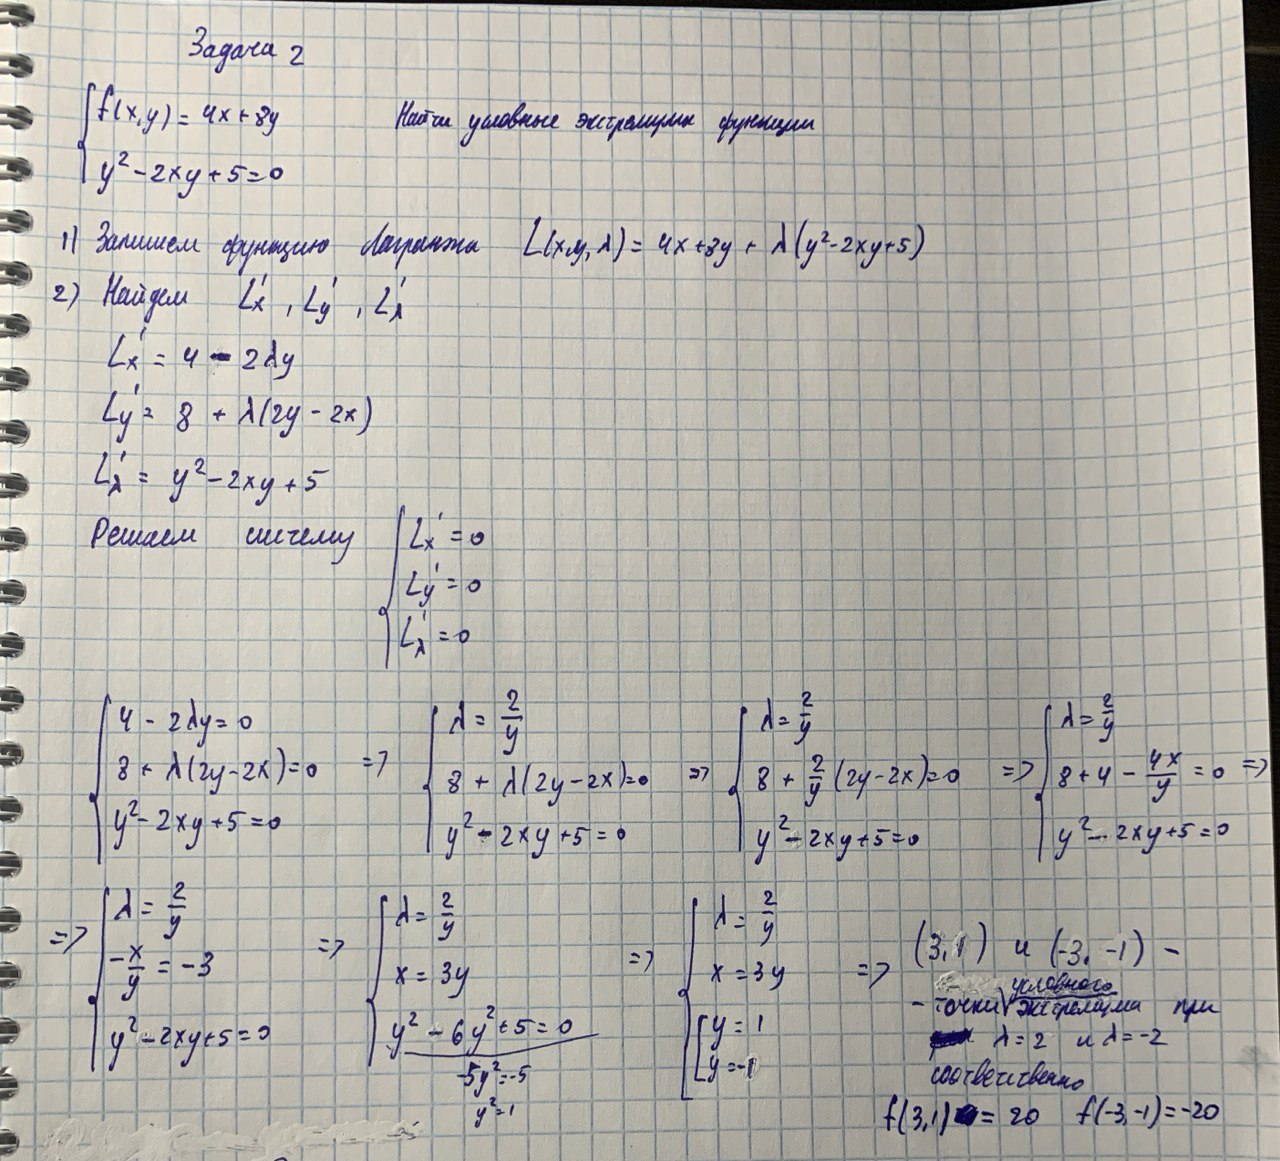

In [2]:
from sympy import symbols, diff, solve

x, y, λ = symbols('x y λ')
# функция
f = 4*x + 8*y
# функция ограничений
g = y**2 - 2*x*y + 5
# функция Лагранжа
L = f - λ * g
# частные производные функции Лагранжа
dL_dx = diff(L, x)
dL_dy = diff(L, y)
dL_dλ = diff(L, λ)

solutions = solve((dL_dx, dL_dy, dL_dλ), (x, y, λ))

for s in solutions:
    print(f"\nТочка условного экстремума: {(s[0], s[1])} при λ={s[2]}")
    print(f'Значение функциии {f} в этой точке равно {f.subs({x: s[0], y: s[1]})}')


Точка условного экстремума: (-3, -1) при λ=2
Значение функциии 4*x + 8*y в этой точке равно -20

Точка условного экстремума: (3, 1) при λ=-2
Значение функциии 4*x + 8*y в этой точке равно 20


**Вывод:** Сравнение ручного решения и решения с помощью python и библиотеки SymPy показало одинаковые результаты. Функция с заданной функцией связи имеет две точки условного экстремума.

**Задача 3** (30 баллов)

Вам предложены данные с информацией о успеваемости студентов:

Независимые переменные:
* Hours Studied: Общее количество часов, потраченных на учебу каждым студентом.
* Previous Scores: Баллы, полученные студентами на предыдущих экзаменах.
* Sleep Hours: Среднее количество часов сна студента в сутки.
* Sample Question Papers Practiced: Количество пробных экзаменационных работ, с которыми студент занимался.
  
Целевая переменная:
* Performance Index: Показатель общей успеваемости каждого студента. Индекс успеваемости отражает академическую успеваемость студента и округляется до ближайшего целого числа. Индекс варьируется от 10 до 100, при этом более высокие значения свидетельствуют о более высокой успеваемости.

**Решите задачу линейной регрессии, реализовав градиентный спуск самостоятельно, не используя готовое решение из какой-либо библиотеки.**

In [13]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm

In [4]:
df = pd.read_csv('Student_Performance.txt', delimiter=',')
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [6]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


### Предобработка данных

In [7]:
df.isnull().sum()

,0
Hours Studied,0
Previous Scores,0
Extracurricular Activities,0
Sleep Hours,0
Sample Question Papers Practiced,0
Performance Index,0


В данных отсутствуют пропуски. Все необходимые по условию признаки числовые.

Нам необходимы следующие независимые признаки модели по условию:  
- Hours Studied: Общее количество часов, потраченных на учебу каждым студентом.
- Previous Scores: Баллы, полученные студентами на предыдущих экзаменах.
- Sleep Hours: Среднее количество часов сна студента в сутки.
- Sample Question Papers Practiced: Количество пробных экзаменационных работ, с которыми студент занимался.

Не указанный в задании столбец Extracurricular Activities удалим из датафрейма

In [8]:
df.drop('Extracurricular Activities', axis=1, inplace=True)
df

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,9,1,91.0
1,4,82,4,2,65.0
2,8,51,7,2,45.0
3,5,52,5,2,36.0
4,7,75,8,5,66.0
...,...,...,...,...,...
9995,1,49,4,2,23.0
9996,7,64,8,5,58.0
9997,6,83,8,5,74.0
9998,9,97,7,0,95.0


### Формализация задачи линейной регрессии
Задача состоит в том, чтобы найти оптимальные параметры, которые дают наилучшие результаты прогнозирования. То есть которые позволят предсказать значение целевой переменной (показатель общей успеваемости каждого студента) по известным признакам (независимым перменным) с минимальной ошибкой.

In [21]:
# количество наблюдений
n = df.shape[0]

# Реализация функции ошибок (потерь)
def loss_function(X, y , par):
    """X - признаки
    par - коэффициенты
    y - целевая переменная """
    y_pred = np.dot(X, par)
    error = (y_pred - y)**2
    loss = 1/(len(y))*np.sum(error)
    return loss

# Реализация градиентного спуска
def gradient_descent(X, y, par, alpha, iterations, eps=1e-4):
    #   X - признаки
    #   par - коэффициенты
    #   y - целевая переменная
    #   alpha - шаг (скорость обучения)
    #   iterations - количество итераций
    costs = []
    for i in range(iterations):
        y_pred = np.dot(X, par)
        grad = np.dot(X.transpose(), (y_pred - y))/ n
        par -= alpha * grad
        loss = loss_function(X, y, par)
        if i % 10000 == 0:
          print(f"iter: {i}; loss: {loss}")
        costs.append(loss)
        if np.linalg.norm(grad) < eps:
            break
    return par, costs

# Данные на вход модели
X = df[['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced']].values.reshape(n,4)
# Целевая переменная
y = df['Performance Index'].values.reshape(n,1)

# Стандартизация данных
scaler = StandardScaler()
X = scaler.fit_transform(X)
# добавляем интерцепт
X = np.append(np.ones((n, 1)), X, axis=1)
# начальный вектор коэффициентов
w = np.zeros((5,1))

# вычисляем коэффициенты регрессии
W, costs = gradient_descent(X, y, w, 0.00005, 500000)
print("\nкоэффициенты регресии:")
print(w.round(3))

# считаем предсказанные параметры с этими коэффициентами
y_pred = np.dot(X, W)

# считаем ошибку предсказания используем метрику MAPE
# Mean absolute percentage error) говорит о средней процентной ошибке между прогнозируемыми и реальными значениями
# Чем ниже значение MAPE, тем выше точность
mape = np.mean(abs(y - y_pred) / y) * 100
print("\nMAPE: ", mape.round(4), "%")
r2 = r2_score(y, y_pred)
print("R2-score: ", np.round(r2, 4))

iter: 0; loss: 3418.5228074469487
iter: 10000; loss: 1261.2406421053226
iter: 20000; loss: 467.0370952181913
iter: 30000; loss: 174.639569951663
iter: 40000; loss: 66.98490306558458
iter: 50000; loss: 27.347094744185615
iter: 60000; loss: 12.752087353167939
iter: 70000; loss: 7.377845110635945
iter: 80000; loss: 5.398831796448792
iter: 90000; loss: 4.6700473663219375
iter: 100000; loss: 4.401655909341393
iter: 110000; loss: 4.302810189007151
iter: 120000; loss: 4.26640468989839
iter: 130000; loss: 4.252995689380171
iter: 140000; loss: 4.2480566044318575
iter: 150000; loss: 4.246237248661169
iter: 160000; loss: 4.245567039739803
iter: 170000; loss: 4.24532013774098
iter: 180000; loss: 4.245229175481717
iter: 190000; loss: 4.245195661925637
iter: 200000; loss: 4.245183313748622
iter: 210000; loss: 4.245178763777229
iter: 220000; loss: 4.245177087142702
iter: 230000; loss: 4.245176469279249
iter: 240000; loss: 4.24517624157485
iter: 250000; loss: 4.2451761576528915
iter: 260000; loss: 4.2

**Анализ итоговой модели и коэффициентов регрессии**:  
Полученные в результате градиентного спуска коэффициенты регрессии являются оптимальными, т.к. позволяют получить предсказанное значение целевого признака, наиболее близкое к истинному значению целевого признака, т.е. с наименьшей ошибкой.

**Предсказание и оценка точности модели**:  
Предсказание модели получается с высокой точностью, о чем говорят значения метрик mape (значение 3.4962% говорит о том, что в среднем прогнозы отличаются от реальных значений на 3.5%) и r2-score (значение 0.9885 близкое к единице, т.е. близкое к идеальным прогнозам).

In [20]:
# Сравнение с библиотечными решениями Python (sklearn)
model = LinearRegression()
model.fit(X, y)
y_pred_lib = model.predict(X)
print(f'MAPE: {(np.mean(abs(y - y_pred_lib) / y) * 100).round(4)}%')
print(f'R2: {np.round(r2_score(y, y_pred_lib), 4)}')

MAPE: 3.4962%
R2: 0.9885


**Сравнение собственных расчетов с результатами использования библиотек**  
Решение собственной реализации и с помощью библиотечной модели совпадают по точности и результатам


# Вывод и интерпретация результатов

Значение MAPE равное 3.4962% говорит о хорошей точности модели

Значение метрики R2: 0.9885, то есть модель объясняет практически 99% изменчивости целевой переменной, то есть существует линейная функциональная зависимость между независимыми переменными(признаками) и таргетом. Модель считается качественной, т.к. значение близко к 1

Решения вручную и с помощью библиотеки sklearn дали одинаковый результат, что говорит о корректной работе модели